In [75]:
%load_ext autoreload
%autoreload 2
import numpy as np
from numpy import linalg as LA

import random

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec


from scipy.integrate import solve_ivp
from itertools import permutations, repeat

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic map

In [76]:
def logistic(r: float, steps:int, x = 0.2) -> float:
    for i in range(steps):
        x = r * x * (1-x)
    return x

In [77]:
def logistic_graph():
    figure(figsize=(10, 10), dpi=80)
    r_values = np.arange(0, 4, 0.00001)
    value = logistic(r_values,500)
    for i in range(0,25):
        value = logistic(r_values,1, x = value)
        plt.plot(r_values, value,',k',alpha=0.25)
    plt.show()

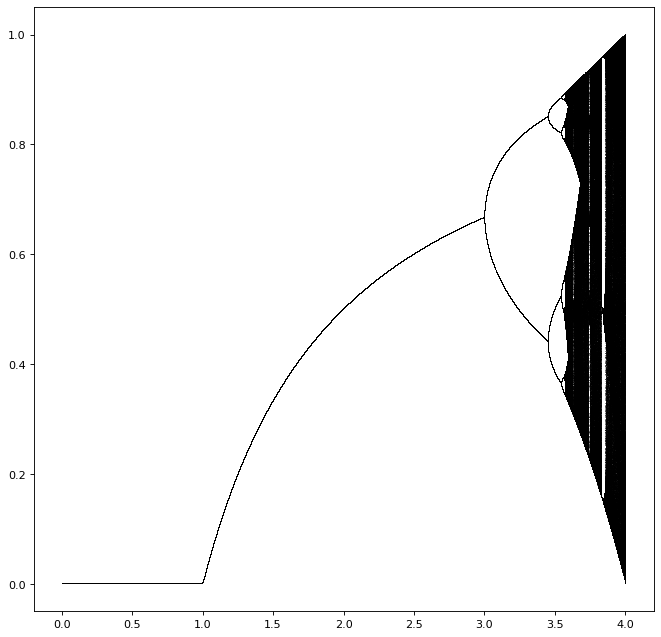

In [78]:
logistic_graph()

# Lorenz

X: 10
900.000000000091
800.0000000001819
700.0000000002728
600.0000000003638
500.00000000045475
400.0000000005457
300.00000000063665
200.0000000007276
100.00000000077875
7.644997100653139e-10
X: 8.40303744490876
Y: 13.759540308171637
Z: 17.252734647859985


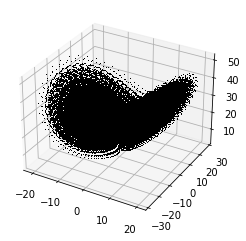

In [70]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = 10
Y = 10
Z = 10
sigma = 10
rho = 28
beta = 8/3
dTau = 0.01
timeEnd = 1000
counter = 0
counter2 = 0

while timeEnd > 0:
    dX = -sigma*X + sigma*Y
    dY = -X * Z + rho*X - Y 
    dZ = X*Y-beta*Z 
    X = X + dX*dTau
    Y = Y + dY*dTau
    Z = Z + dZ*dTau
    timeEnd = timeEnd - dTau
    counter = counter + 1
    if counter >= 100:
        counter = 0
        counter2 = counter2+1
        if counter2 >= 100:
            print(timeEnd)
            counter2 = 0
    ax.plot3D(X,Y,Z,',k')
print("X: " + str(X))
print("Y: " + str(Y))
print("Z: " + str(Z))

X: 6.090839675144973
Y: 9.910292516979917
Z: 15.81007565197154
X1: 6.579904555988568
Y1: 10.598888340751031
Z1: 16.441070946698076
Steps it took: 2071
Steps it took: 20.71


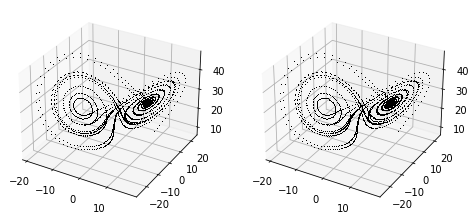

In [83]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax1 = fig.add_subplot(1, 2, 2, projection='3d')

X = 10
Y = 10
Z = 10
X1 = 10+0.00000001
Y1 = 10
Z1 = 10
sigma = 10
rho = 28
beta = 8/3
dTau = 0.01

counter = 0
counter2 = 0

distance = np.linalg.norm([X-X1,Y-Y1,Z-Z1])
while distance < 1 :
    dX = -sigma*X + sigma*Y
    dY = -X * Z + rho*X - Y 
    dZ = X*Y-beta*Z 
    X = X + dX*dTau
    Y = Y + dY*dTau
    Z = Z + dZ*dTau
    
    dX1 = -sigma*X1 + sigma*Y1
    dY1 = -X1 * Z1 + rho*X1 - Y1
    dZ1 = X1*Y1-beta*Z1 
    X1 = X1 + dX1*dTau
    Y1 = Y1 + dY1*dTau
    Z1 = Z1 + dZ1*dTau
    
    distance = np.linalg.norm([X-X1,Y-Y1,Z-Z1])
    
    counter = counter + 1
    
    ax.plot3D(X,Y,Z,',k')
    ax1.plot3D(X1,Y1,Z1,',k')
print("X: " + str(X))
print("Y: " + str(Y))
print("Z: " + str(Z))
print("X1: " + str(X1))
print("Y1: " + str(Y1))
print("Z1: " + str(Z1))
print("Steps it took: " + str(counter))
print("Steps it took: " + str(counter*dTau))
plt.show()

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax1 = fig.add_subplot(1, 2, 2, projection='3d')

X = 10
Y = 10
Z = 10
X1 = 10+0.00000001
Y1 = 10
Z1 = 10
sigma = 10
rho = 0.5
beta = 8/3
dTau = 0.01

counter = 0
counter2 = 0

distance = np.linalg.norm([X-X1,Y-Y1,Z-Z1])
while distance < 1 :
    dX = -sigma*X + sigma*Y
    dY = -X * Z + rho*X - Y 
    dZ = X*Y-beta*Z 
    X = X + dX*dTau
    Y = Y + dY*dTau
    Z = Z + dZ*dTau
    
    dX1 = -sigma*X1 + sigma*Y1
    dY1 = -X1 * Z1 + rho*X1 - Y1
    dZ1 = X1*Y1-beta*Z1 
    X1 = X1 + dX1*dTau
    Y1 = Y1 + dY1*dTau
    Z1 = Z1 + dZ1*dTau
    
    distance = np.linalg.norm([X-X1,Y-Y1,Z-Z1])
    
    counter = counter + 1
    
    ax.plot3D(X,Y,Z,',k')
    ax1.plot3D(X1,Y1,Z1,',k')
print("X: " + str(X))
print("Y: " + str(Y))
print("Z: " + str(Z))
print("X1: " + str(X1))
print("Y1: " + str(Y1))
print("Z1: " + str(Z1))
print("Steps it took: " + str(counter))
print("Steps it took: " + str(counter*dTau))
plt.show()